In [1]:
import numpy as np

In [2]:
A = np.array([[2, 3, 5, 4, 6], 
              [4, 5, 7, 7, 7], 
              [6, 6, 4, 3, 2],
              [3, 4, 3, 1, 1]
            ])
window = np.ones((3, 3))
padding_image = np.zeros((
                    A.shape[0] + 2*1,
                    A.shape[1] + 2*1
                ))

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        padding_image[i + 1, j + 1] = A[i][j]

print(padding_image)
conv_height_size = int(((A.shape[0] + (2*1) - 3) / 1) + 1)
conv_width_size = int(((A.shape[1] + (2*1) - 3) / 1) + 1)

result_image = np.zeros((conv_height_size, conv_width_size))
for i in range(conv_height_size):
    for j in range(conv_width_size):
        if A[i][j] < np.max(padding_image[i:i+3, j:j+3] * window):
           #A[i][j] = 0
            result_image[i, j] = 0
        else:   
            result_image[i, j] = A[i][j]

print(result_image)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 3. 5. 4. 6. 0.]
 [0. 4. 5. 7. 7. 7. 0.]
 [0. 6. 6. 4. 3. 2. 0.]
 [0. 3. 4. 3. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 7. 7. 7.]
 [6. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [3]:
padding_result_image = np.zeros((
                        result_image.shape[0] + 2*1,
                        result_image.shape[1] + 2*1
                    ))

window = np.ones((3, 3))

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        padding_result_image[i + 1, j + 1] = result_image[i][j]

print(padding_result_image)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 7. 7. 7. 0.]
 [0. 6. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [4]:
def ApplyGaussianFilter(window_size):
    GaussianFilter = np.zeros((window_size, window_size))
    m = 0
    for row in range(-1, 2):
        for col in range(-1, 2):
            GaussianFilter[row + 1][col + 1] = np.exp(-(row**2 + col**2) / 2 * 0.0001)
            m += GaussianFilter[row + 1][col + 1]

    return GaussianFilter/m

In [5]:
GaussianFilter = ApplyGaussianFilter(3)

In [6]:
GaussianFilter

array([[0.11110741, 0.11111296, 0.11110741],
       [0.11111296, 0.11111852, 0.11111296],
       [0.11110741, 0.11111296, 0.11110741]])

In [7]:
def GaussianFilter2D(window_size, sigma):
        GaussianFilter = np.zeros((window_size, window_size))
        m = 0
        for row in range(-(window_size // 2), (window_size // 2) + 1):
            for col in range(-(window_size // 2), (window_size // 2) + 1):
                GaussianFilter[row + 1][col + 1] = (1 / (2 * np.pi * sigma**2)) * (np.exp(-(row**2 + col**2) / (2 * (sigma**2))))
                m += GaussianFilter[row + 1][col + 1]

        return GaussianFilter / m

In [8]:
GaussianFilter2D(3, 1)

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [9]:
import matplotlib.pyplot as plt

In [10]:
sigma = 5
x = np.arange(-10, 10, 0.01)
title = 'Gaussian, ' + 'sigma = ' + str(sigma) + ', Mean = 0' 
result = []
for i in x:
    y = (1 / (2 * np.pi * sigma**2)) * (np.exp(-(i**2) / (2 * (sigma**2))))
    result.append(y)


Text(0, 0.5, 'f(x)')

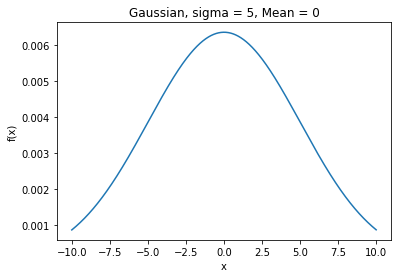

In [11]:
plt.title(title)
plt.plot(x, result)
plt.xlabel('x')
plt.ylabel('f(x)')

In [12]:
def SobelFilter2D(window_size, sigma):
        SobelFilter_x = np.zeros((window_size, window_size))
        SobelFilter_y = np.zeros((window_size, window_size))
        
        for row in range(-(window_size // 2), (window_size // 2) + 1):
            for col in range(-(window_size // 2), (window_size // 2) + 1):
                SobelFilter_x[row + 1][col + 1] = (-row / (2 * np.pi * sigma**4)) * (np.exp(-(row**2 + col**2) / (2 * (sigma**2))))
                SobelFilter_y[row + 1][col + 1] = (-col / (2 * np.pi * sigma**4)) * (np.exp(-(row**2 + col**2) / (2 * (sigma**2))))

        return SobelFilter_x, SobelFilter_y


In [13]:
SobelFilter_x, SobelFilter_y = SobelFilter2D(3, 1)

In [14]:
SobelFilter_x

array([[ 0.05854983,  0.09653235,  0.05854983],
       [ 0.        ,  0.        ,  0.        ],
       [-0.05854983, -0.09653235, -0.05854983]])

In [15]:
SobelFilter_y

array([[ 0.05854983,  0.        , -0.05854983],
       [ 0.09653235,  0.        , -0.09653235],
       [ 0.05854983,  0.        , -0.05854983]])

In [16]:
'''
def Histogram(self, image):
    Gaussian_filtered_image = self.ApplyGaussianFilter(image, 1)
    filtered_image, EdgeNormal = self.ApplySobelFilter(Gaussian_filtered_image, 1)
    NMS_image = self.NonMaximalSuppresion(filtered_image, EdgeNormal)
    pixel_array = np.zeros((256,), dtype=np.uint8)
    count_val = np.zeros((256,), dtype=np.uint8)

    for i in range(len(pixel_array)):
        pixel_array[i] = i
        
    for row in range(NMS_image.shape[0]):
        for col in range(NMS_image.shape[1]):
            for i in range(len(pixel_array)):
                if pixel_array[i] == NMS_image[row][col]:
                    count_val[i] += 1

    hist = np.zeros((np.max(count_val), 256), dtype=np.uint8)
    for i in range(len(pixel_array)):
        c = 0
        for j in range(np.max(count_val)):
            if count_val[i] >= c:
                hist[np.max(count_val) - 1 - j, i] = 255
            c += 1

    hist = resize(hist, (256, 256))

    plt.title('histogram')
    plt.imshow(hist, cmap='gray')
    plt.show()

    return hist
'''

"\ndef Histogram(self, image):\n    Gaussian_filtered_image = self.ApplyGaussianFilter(image, 1)\n    filtered_image, EdgeNormal = self.ApplySobelFilter(Gaussian_filtered_image, 1)\n    NMS_image = self.NonMaximalSuppresion(filtered_image, EdgeNormal)\n    pixel_array = np.zeros((256,), dtype=np.uint8)\n    count_val = np.zeros((256,), dtype=np.uint8)\n\n    for i in range(len(pixel_array)):\n        pixel_array[i] = i\n        \n    for row in range(NMS_image.shape[0]):\n        for col in range(NMS_image.shape[1]):\n            for i in range(len(pixel_array)):\n                if pixel_array[i] == NMS_image[row][col]:\n                    count_val[i] += 1\n\n    hist = np.zeros((np.max(count_val), 256), dtype=np.uint8)\n    for i in range(len(pixel_array)):\n        c = 0\n        for j in range(np.max(count_val)):\n            if count_val[i] >= c:\n                hist[np.max(count_val) - 1 - j, i] = 255\n            c += 1\n\n    hist = resize(hist, (256, 256))\n\n    plt.title(

In [ ]:
# h, w = Final_result_image1.shape[:2]
# filled_from_bottom = np.zeros((h, w))

# for col in range(w):
#     for row in reversed(range(h)):
#         if Final_result_image1[row][col] < 255: filled_from_bottom[row][col] = 255 # 아래 위
#         else: break

# for row in range(h):
#     for col in range(w):
#         if Final_result_image1[row][col] < 255: filled_from_bottom[row][col] = 255 # 왼 오
#         else: break

# for row in range(h):
#     for col in reversed(range(w)):
#         if Final_result_image1[row][col] < 255: filled_from_bottom[row][col] = 255 # 오 왼
#         else: break

# for col in reversed(range(w)):
#     for row in range(h):
#         if Final_result_image1[row][col] < 255: filled_from_bottom[row][col] = 255 # 위 아래
#         else: break
# for row in range(h):
#     for col in range(w):
#         if filled_from_bottom[row][col] == 0:
#             filled_from_bottom[row, col] = 255
#         else:
#             filled_from_bottom[row, col] = 0

In [ ]:
# B=[]
# starting_pixel = list(zip(*np.where(closed_image == 255))) 
# B_x = starting_pixel[0][0]
# B_y = starting_pixel[0][1]
# B.append(starting_pixel[0])

# b_x = starting_pixel[0][0]
# b_y = starting_pixel[0][1]-1

# d_x = b_x - B_x
# d_y = b_y - B_y

# offsetTable = [(0,0),(0,-1),(-1,-1),(-1,0),(-1,1),(0,1),(1,1),(1,0),(1,-1)]
# count = 1
# contour = np.zeros((original_color_image2.shape), dtype=np.uint8)
# while(count<=2):
#     id=0
#     for i in range(9):
#         if(d_x == offsetTable[i][0] and d_y == offsetTable[i][1]):
#             id = i            
#             break
    
#     while(True):
#         if(id == 8):
#             id = 0       
#         c_x=B_x+offsetTable[id+1][0]
#         c_y=B_y+offsetTable[id+1][1]        
#         if (closed_image[c_x][c_y]!=0):
#             B_x = c_x
#             B_y = c_y                       
#             temp = (B_x,B_y)           
#             if (temp in B)==True:
#                 count += 1
#             B.append((B_x,B_y))
#             d_x = prev_x-B_x
#             d_y = prev_y-B_y
#             break
#         prev_x = c_x
#         prev_y = c_y        
#         id += 1
# for pixel in range(len(B)):
#       #contour[B[pixel][0]][B[pixel][1]] = [0,255,0]
#       original_color_image2[B[pixel][0], B[pixel][1], 0] = 0
#       original_color_image2[B[pixel][0], B[pixel][1], 1] = 255
#       original_color_image2[B[pixel][0], B[pixel][1], 2] = 0